In [60]:
import numpy as np 
import time
import scipy
from scipy.spatial import KDTree
from astropy import units
from matplotlib import pyplot as plt
from galpy.df import dehnendf
from galpy.orbit import Orbit
from galpy.util.bovy_coords import rect_to_cyl_vec
from galpy.util.bovy_coords import rect_to_cyl
from galpy.potential import PowerSphericalPotential
import numpy as np
from astropy import units
from galpy.orbit import Orbit

In [61]:
dfc = dehnendf(beta = 0.)

In [62]:
o = np.loadtxt('diskdf-sample-for-lily.dat')

Text(0, 0.5, 'y position')

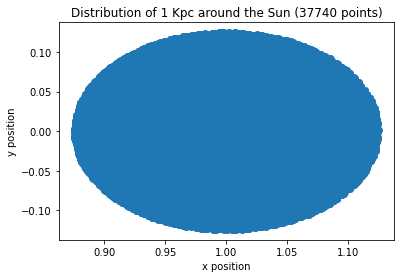

In [63]:
x = o[:,0]
y = o[:,1]
vx = o[:,2]
vy = o[:,3]

arr = np.array(((0,)*4,)*37740, float)
zer = np.zeros(len(x), float)

arr[:,0] = rect_to_cyl(x, y, zer)[0]   #R (X, Y, Z) -> (R, phi, Z) 
arr[:, 1] = rect_to_cyl_vec(vx, vy, zer, x, y, zer, cyl = False)[0] 
arr[:, 2] = rect_to_cyl_vec(vx, vy, zer, x, y, zer, cyl = False)[1] 
arr[:, 3] = rect_to_cyl(x, y, zer)[1]  #phi (X, Y, Z) -> (R, phi, Z) 

oc = Orbit(arr)  

plt.plot(oc.x(), oc.y(), 'o')
plt.title("Distribution of 1 Kpc around the Sun (37740 points)" )
plt.xlabel('x position')
plt.ylabel('y position')

Text(0, 0.5, 'y position')

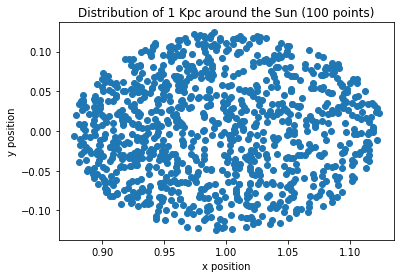

In [64]:
n = 1000

op = oc[0:n]
opp = oc[0:n]

plt.plot(op.x(), op.y(), 'o')
plt.title('Distribution of 1 Kpc around the Sun (100 points)')
plt.xlabel('x position')
plt.ylabel('y position')

In [65]:
def lp(a):
    return PowerSphericalPotential(amp=1.,alpha=a,normalize=True,r1=1.,ro=None,vo=None)

In [66]:
def alphafinder(a):
    alpha = a[0]
    g = lp(alpha)
    ts = np.linspace(0.,100.,1001)
    op.integrate(ts, g)

    voronoi = [ [] for i in range(n)]
    x1 = opp.x()
    y1 = opp.y()
    
    vx1 = opp.vx()
    vy1 = opp.vy()

    for k in range(len(op.x(ts))):

        x2 = op.x(ts)[:,k]
        y2 = op.y(ts)[:,k]
        vx2 = op.vx(ts)[:,k]
        vy2 = op.vy(ts)[:,k]

        tree_pos = KDTree(np.c_[x1.ravel(), y1.ravel(), vx1.ravel(), vy1.ravel()])

        ab = np.zeros([n, 4])
        
        for i in range(len(x2)):
            ab[i] = [x2[i], y2[i], vx2[i], vy2[i]]
    
        dd, ii_pos = tree_pos.query(ab, k=1)

        for i in range(len(ii_pos)):
            voronoi[ii_pos[i]].append(1) 

    prob = [ [] for i in range(n)]
    prob = [len(voronoi[i])/n for i in range(len(voronoi))]

    loggedvoronoi = []
    loggedvoronoi = [np.log(prob[i]) for i in range(len(voronoi)) if prob[i] != 0]
        
    Sum = np.sum(loggedvoronoi)
    return (Sum) 

Text(0.5, 1.0, 'Best Fitted Alpha')

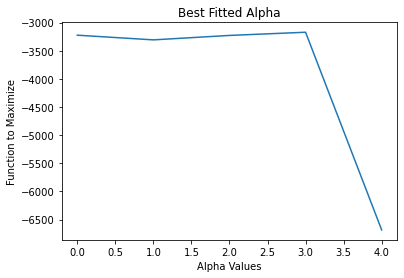

In [67]:
a = np.arange(0, 5)
emp = np.array(((0,)*len(a)), float)

emp = [alphafinder([alpha]) for alpha in a]

plt.plot(a, emp)
plt.xlabel('Alpha Values')
plt.ylabel('Function to Maximize')
plt.title('Best Fitted Alpha')

In [ ]:
#  ab = [x2[i], y2[i], vx2[i], vy2[i] for i in range(len(x2))]
#  voronoi = [voronoi[ii_pos[i]].append(1) for i in range(len(ii_pos))]